# Exercise 3

Work on this before the next lecture on 1 May. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [3]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

Finding analytic gradients of expressions. Use the backprop framework we built in the lecture to compute the analytic gradient of an expression. This is useful to get thinking about
writing computations as graphs and to see first hand that there is no magic involved
in automatically finding derivatives.

For example, using the expression: $f(x) = \sin(x^2)$: implement a module for $\sin(x)$, build the graph representing the function, plot the expression as well as the gradient as a function of $x$.

* add a new operation (e.g. $\sin, \cos, \exp, x^y$, ...) to the `Addition` and `Multiply` modules.
* build a new expression using the available expressions
* plot your expression as well as its gradient
* compare the gradient to one you worked out by hand (or some other software package)

ps. if you want to use automatic differentiation for serious projects outside of neural
network projects checkout packages like https://github.com/HIPS/autograd

In [4]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y
    
    def backward(self, dLdz):
        dzdx = self.y
        dLdx = dLdz * dzdx
        
        dzdy = self.x
        dLdy = dLdz * dzdy
        return [dLdx, dLdy]


class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x + y
        
    def backward(self, dLdz):
        dzdy = 1
        dzdx = 1
        return [dLdz * dzdy, dLdz * dzdx]

In [5]:
def f_with_gradients(x, y, z):
    q = Add()
    f = Multiply()
    
    q_out = q.forward(x, y)
    f_out = f.forward(q_out, z)
    
    grad_f = f.backward(1.)
    grad_q = q.backward(grad_f[0])

    gradients = [grad_q[0], grad_q[1], grad_f[1]]
    return f_out, gradients

(12, [4.0, 4.0, 3.0])


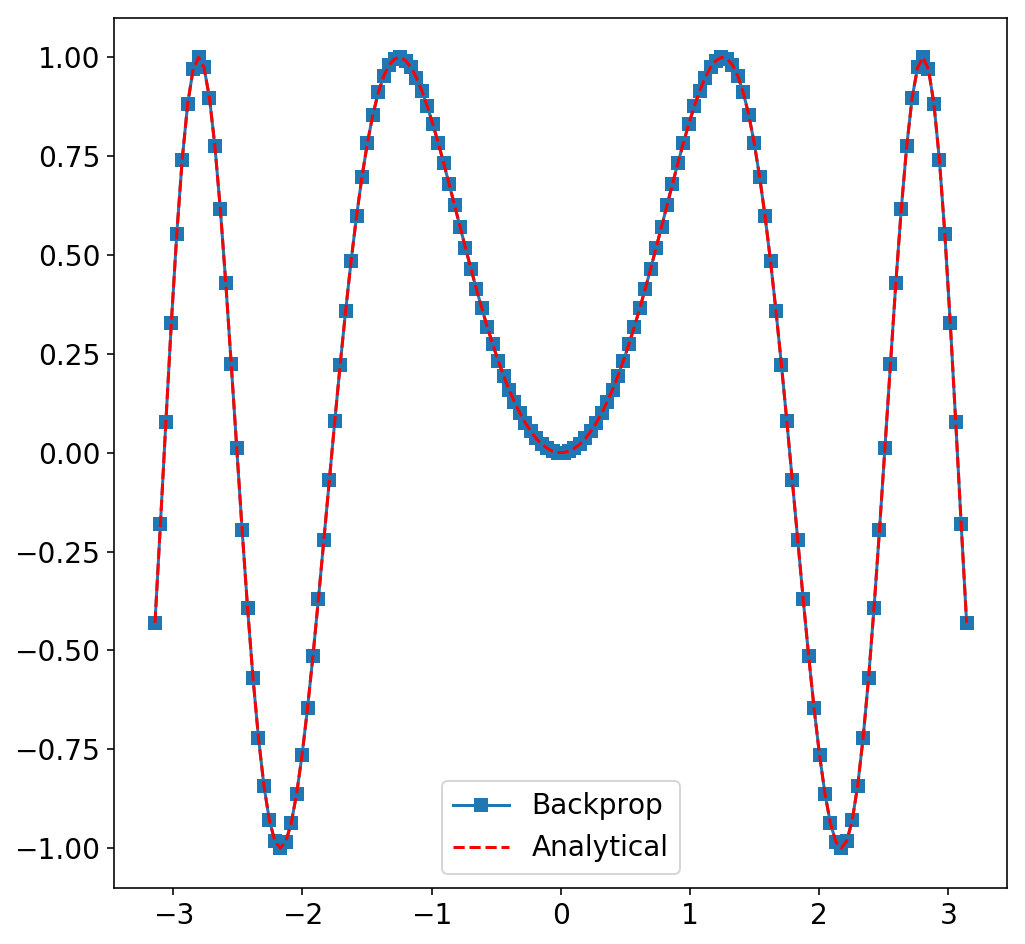

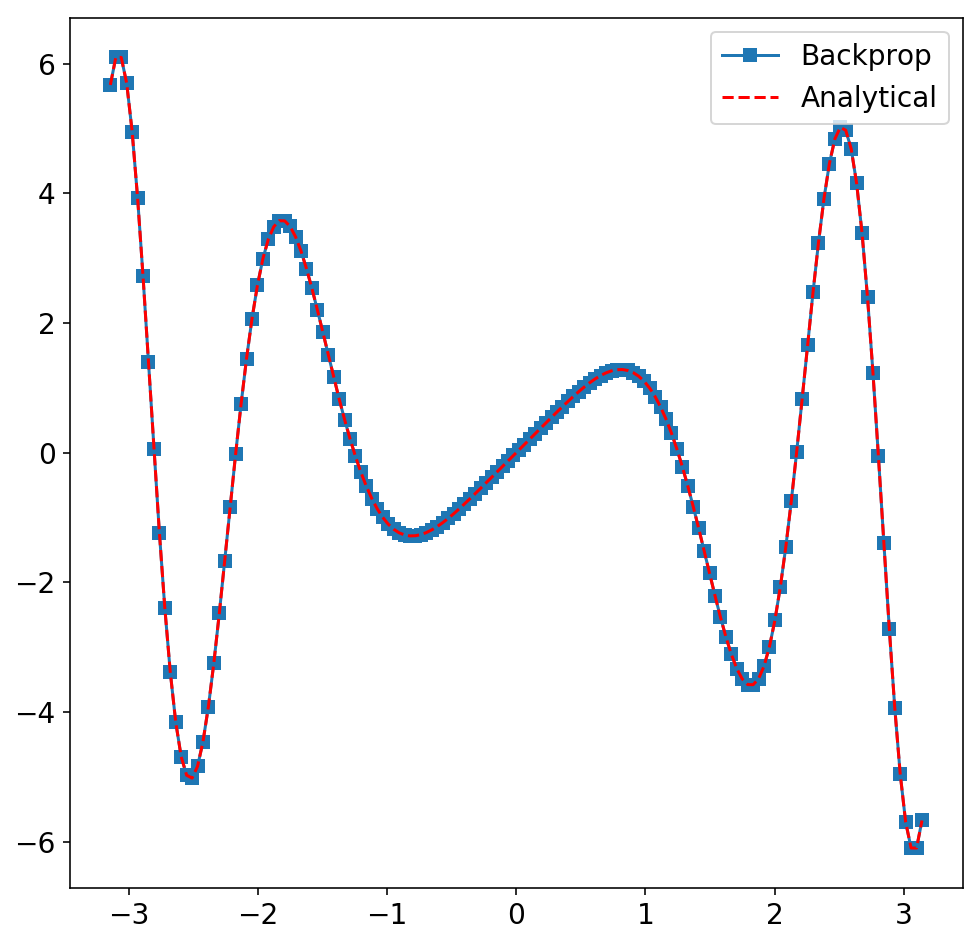

In [6]:
# your solution here
class sin:
    def forward(self,x):
        self.x = x
        return np.sin(x)
    def backward(self,dLdz):
        dzdx = np.cos(self.x)
        dLdx = dLdz * dzdx
        return dLdx
def compute_sinx2(x):
    q = Multiply()
    f = sin()
    q_out = q.forward(x, x)
    f_out = f.forward(q_out)
    grad_f = f.backward(1.)
    grad_q = q.backward(grad_f)
    return f_out, grad_q[0] + grad_q[1] # add both terms in this case, since d(x*x) = 1*x+x*1 = 2*x
def analytical_sinx2(x):
    return np.sin(x**2),2*x*np.cos(x**2)
print(f_with_gradients(1, 2, 4))
inp_args = np.linspace(-1*np.pi,1*np.pi,150)
vals = np.array([compute_sinx2(x) for x in inp_args])
vals_analy = np.array([analytical_sinx2(x) for x in inp_args])
plt.plot(inp_args,vals[:,0],marker='s')
plt.plot(inp_args,vals_analy[:,0],'r--')
plt.legend(['Backprop','Analytical'])
plt.figure()
plt.plot(inp_args,vals[:,1],marker='s')
plt.plot(inp_args,vals_analy[:,1],'r--')
plt.legend(['Backprop','Analytical'])

---

## Question 2

Use the circle data set from exercise 1 and build a neural network classifier that can solve the problem (scikit-learn provides a MLPClassifier classifier that implements a neural network). Comment on:

* what is the minimum number of layers
* what is the minimum width of each layer
* does the answer change if you provide polynomial features?
* thinking about how NNs distort and transform the problem space, can you create
  a visualisation of what it is the network is doing to make this problem linearly
  separable?
* is there a difference between using the tanh and ReLU activation functions?

0.693475137954
0.0334661278884
         ##########   Linear Features   ##########


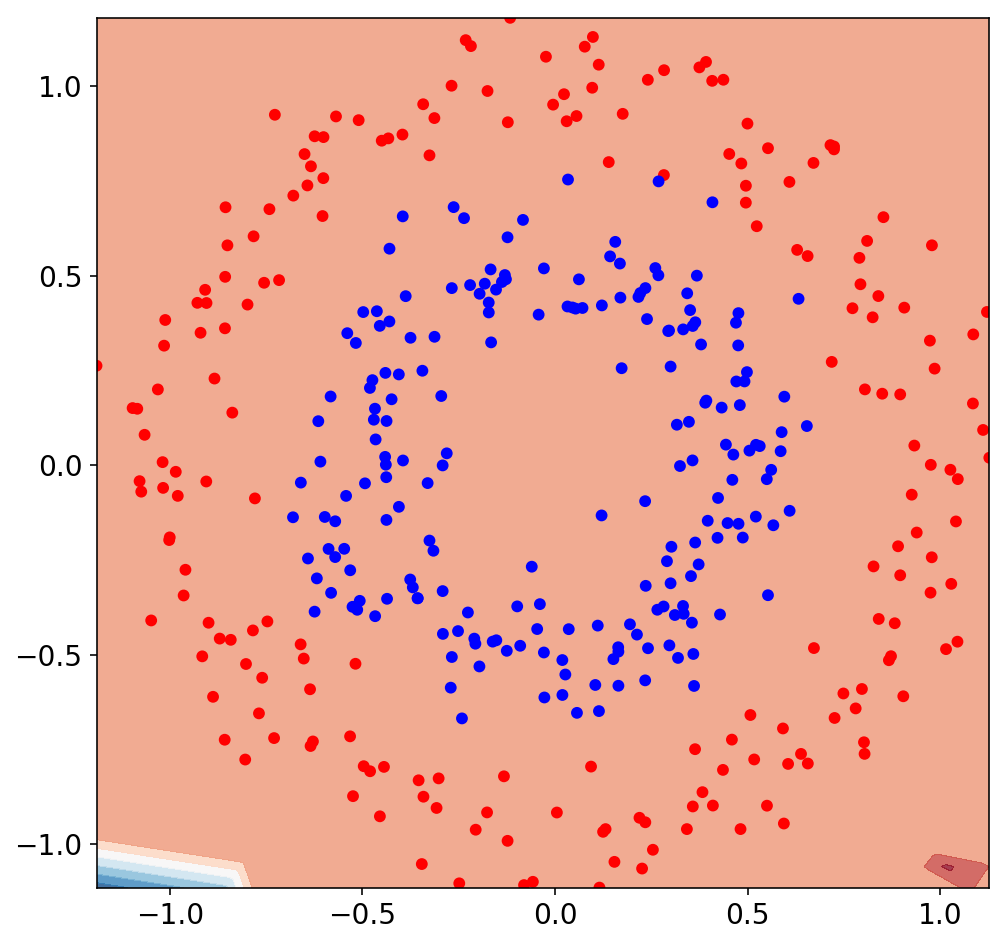

         ##########   With Polynomial Features   ##########


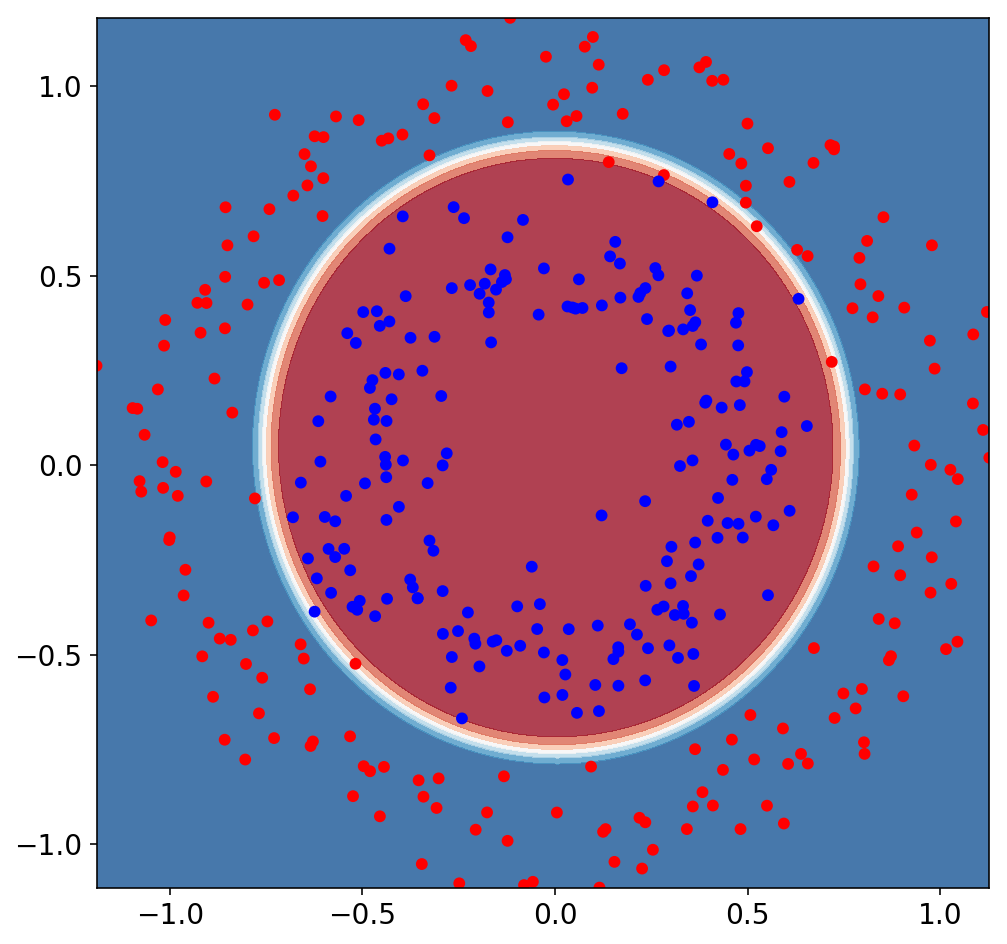

In [7]:
# your answer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from utils import plot_surface


X, y = make_circles(n_samples=400, factor=.5, noise=.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

#plt.scatter(X[:,0], X[:,1], c=y)
clf = MLPClassifier(activation='relu',hidden_layer_sizes=(4,3), verbose = False,learning_rate = 'adaptive', learning_rate_init = 0.05, random_state=42)
clf.fit(X_train,y_train)
clf2 = Pipeline([('polyfeat',PolynomialFeatures()),('nn',MLPClassifier(activation='relu',hidden_layer_sizes=(3,2), verbose = False,learning_rate = 'adaptive', learning_rate_init = 0.05, random_state=42))])
clf2.fit(X_train,y_train)
print(clf.loss_)
print(clf2.steps[1][1].loss_)
print('         ##########   Linear Features   ##########')
plot_surface(clf,X,y)
print('         ##########   With Polynomial Features   ##########')
plot_surface(clf2,X,y)

0.7120965321
0.00470750926132
         ##########   Linear Features, Identity   ##########


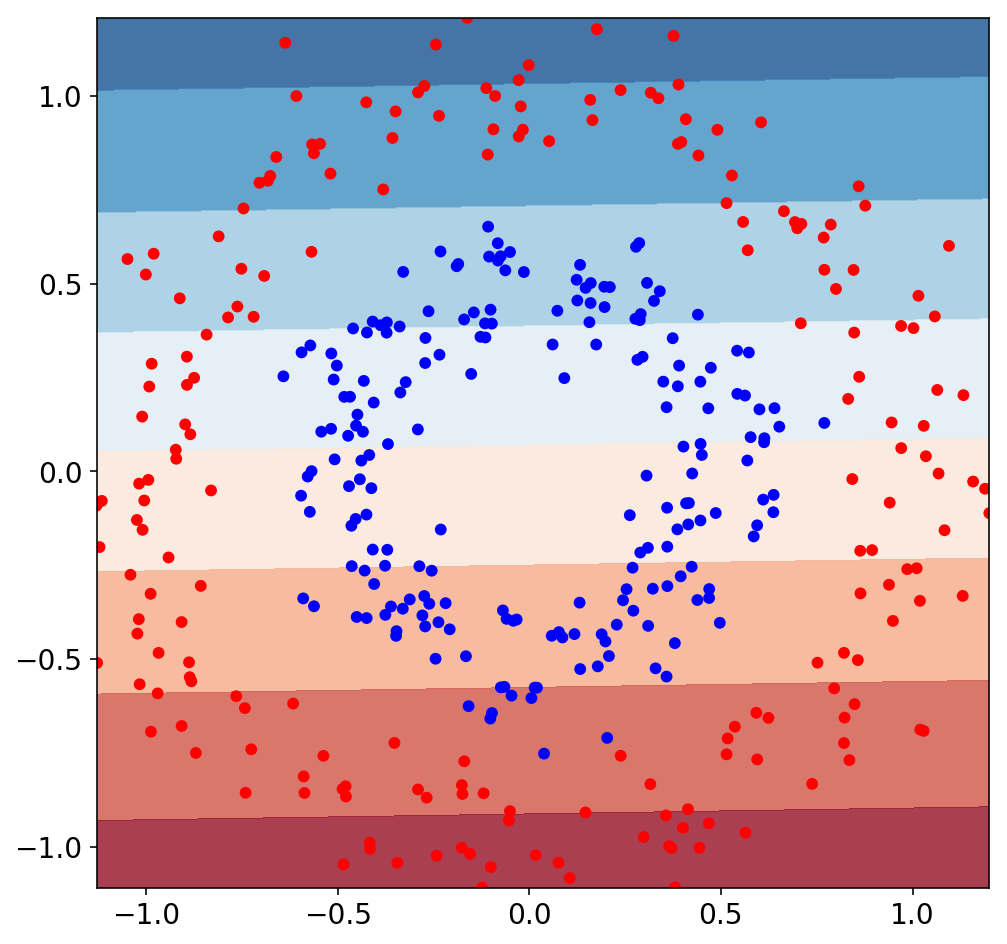

         ##########   With Polynomial Features, Identity   ##########


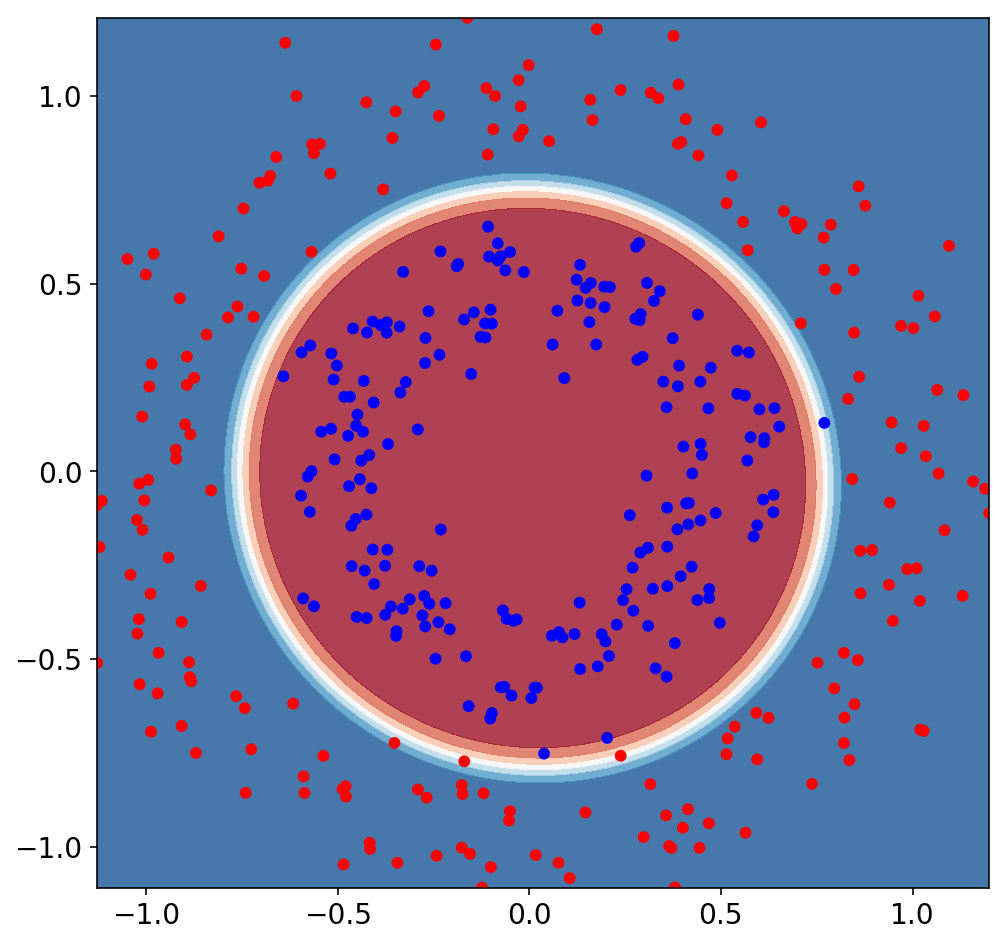

In [102]:
clf3 = MLPClassifier(activation='identity',hidden_layer_sizes=(5,5), verbose = False,learning_rate = 'adaptive', learning_rate_init = 0.05, random_state=42)
clf3.fit(X_train,y_train)
clf4 = Pipeline([('polyfeat',PolynomialFeatures()),('nn',MLPClassifier(activation='identity',hidden_layer_sizes=(1,1), verbose = False,learning_rate = 'adaptive', learning_rate_init = 0.05, random_state=42))])
clf4.fit(X_train,y_train)
print(clf3.loss_)
print(clf4.steps[1][1].loss_)
print('         ##########   Linear Features, Identity   ##########')
plot_surface(clf3,X,y)
print('         ##########   With Polynomial Features, Identity   ##########')
plot_surface(clf4,X,y)

0.0212294435643
0.00371902475549
         ##########   Linear Features, Identity   ##########


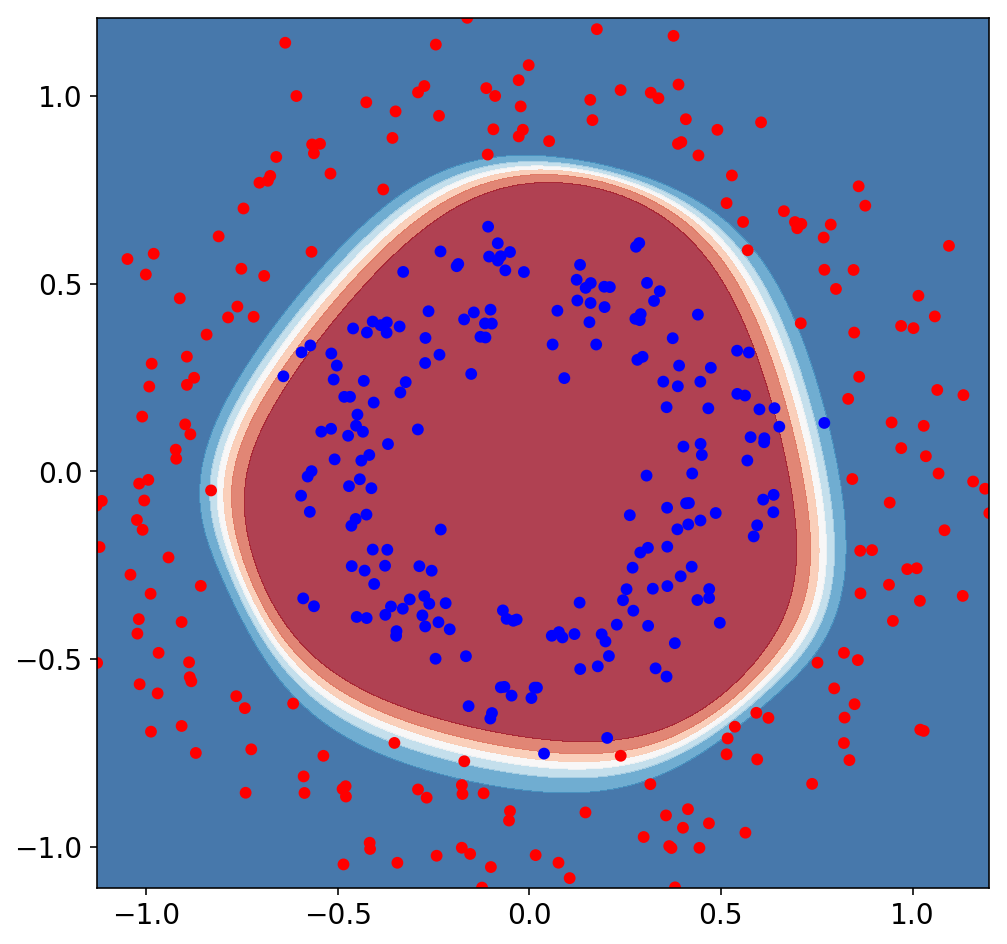

         ##########   With Polynomial Features, Identity   ##########


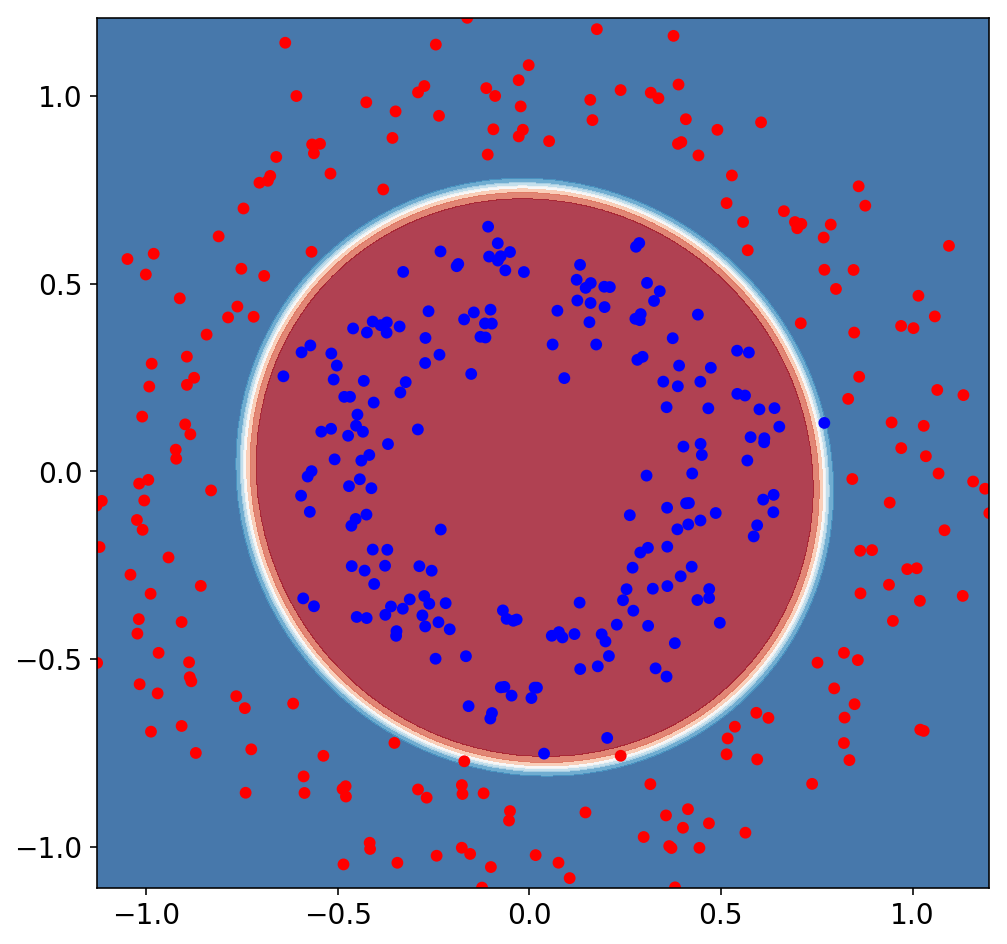

In [97]:
clf5 = MLPClassifier(activation='tanh',hidden_layer_sizes=(4,3), verbose = False,learning_rate = 'adaptive', learning_rate_init = 0.05, random_state=42)
clf5.fit(X_train,y_train)
clf6 = Pipeline([('polyfeat',PolynomialFeatures()),('nn',MLPClassifier(activation='tanh',hidden_layer_sizes=(3,2), verbose = False,learning_rate = 'adaptive', learning_rate_init = 0.05, random_state=42))])
clf6.fit(X_train,y_train)
print(clf5.loss_)
print(clf6.steps[1][1].loss_)
print('         ##########   Linear Features, Identity   ##########')
plot_surface(clf5,X,y)
print('         ##########   With Polynomial Features, Identity   ##########')
plot_surface(clf6,X,y)

---

## Question 2.5

Use the spiral data set build a neural network classifier that can solve the problem (scikit-learn provides a MLPClassifier classifier that implements a neural network). Comment on:
* what is the minimum number of layers
* what is the minimum width of each layer
* is there a difference between using the tanh and ReLU activation functions?
* (bonus) build the same neural network using `keras` instead.
* (bonus) can you create a visualisation to show how the network transforms the problem? (Tim isn't sure this can be done, so don't spend forever on this.)

In [13]:
def make_spiral():
    N = 100 # number of points per class
    K = 3 # number of classes
    X = np.zeros((N*K, 2)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N) # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    return X, y

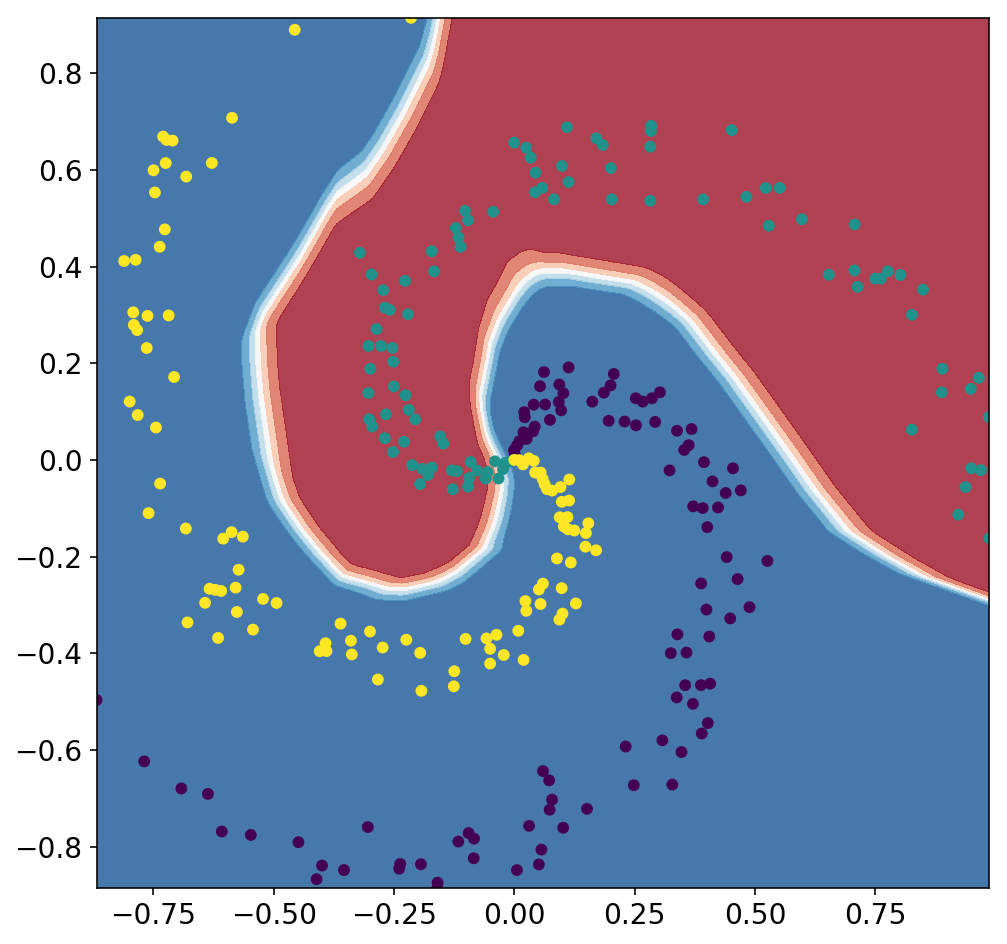

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        22
          1       1.00      1.00      1.00        16
          2       1.00      0.95      0.98        22

avg / total       0.98      0.98      0.98        60



In [28]:
# your answer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from utils import plot_surface

X,y = make_spiral()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MLPClassifier(activation='relu',hidden_layer_sizes=(100,20), verbose = False,learning_rate = 'adaptive', learning_rate_init = 0.05)
clf.fit(X_train,y_train)
plot_surface(clf,X,y)
clf.score(X_test,y_test)
print(classification_report(y_test,clf.predict(X_test)))

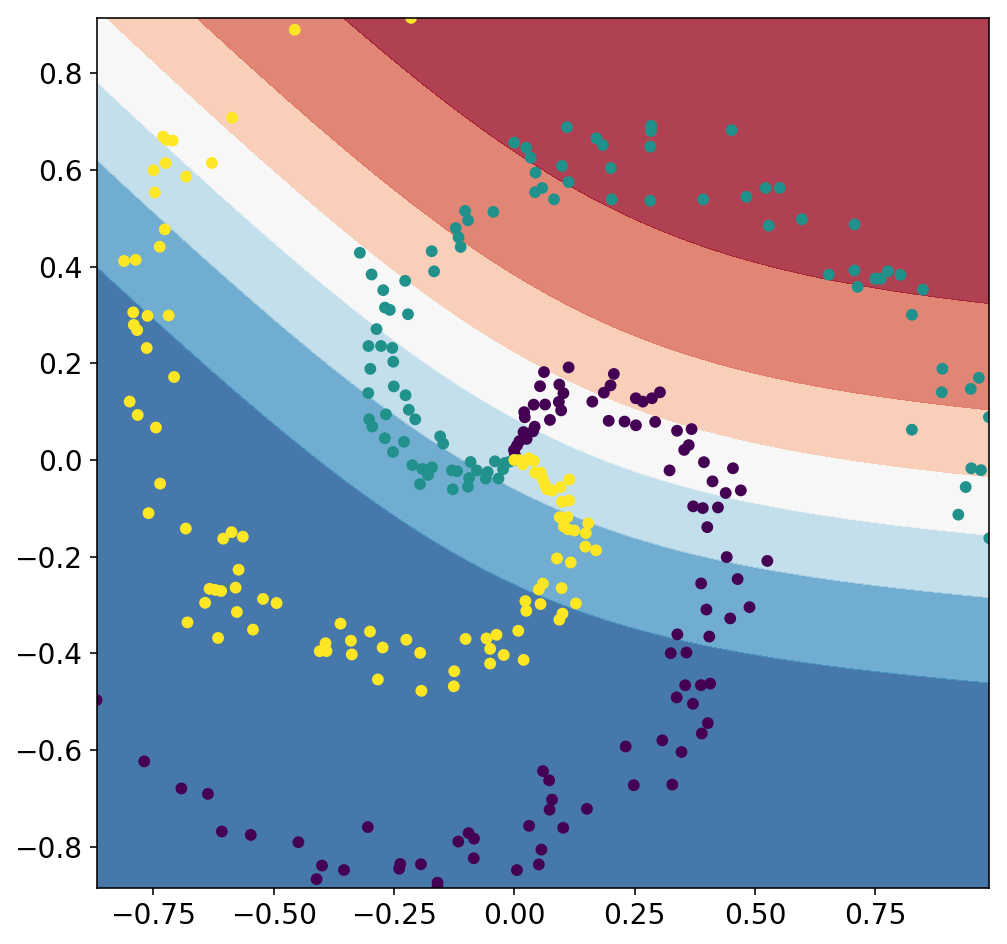

             precision    recall  f1-score   support

          0       0.56      0.45      0.50        22
          1       0.52      0.69      0.59        16
          2       0.57      0.55      0.56        22

avg / total       0.55      0.55      0.55        60



In [29]:
clf = MLPClassifier(activation='identity',hidden_layer_sizes=(100,20), verbose = False,learning_rate = 'adaptive', learning_rate_init = 0.05)
clf.fit(X_train,y_train)
plot_surface(clf,X,y)
clf.score(X_test,y_test)
print(classification_report(y_test,clf.predict(X_test)))

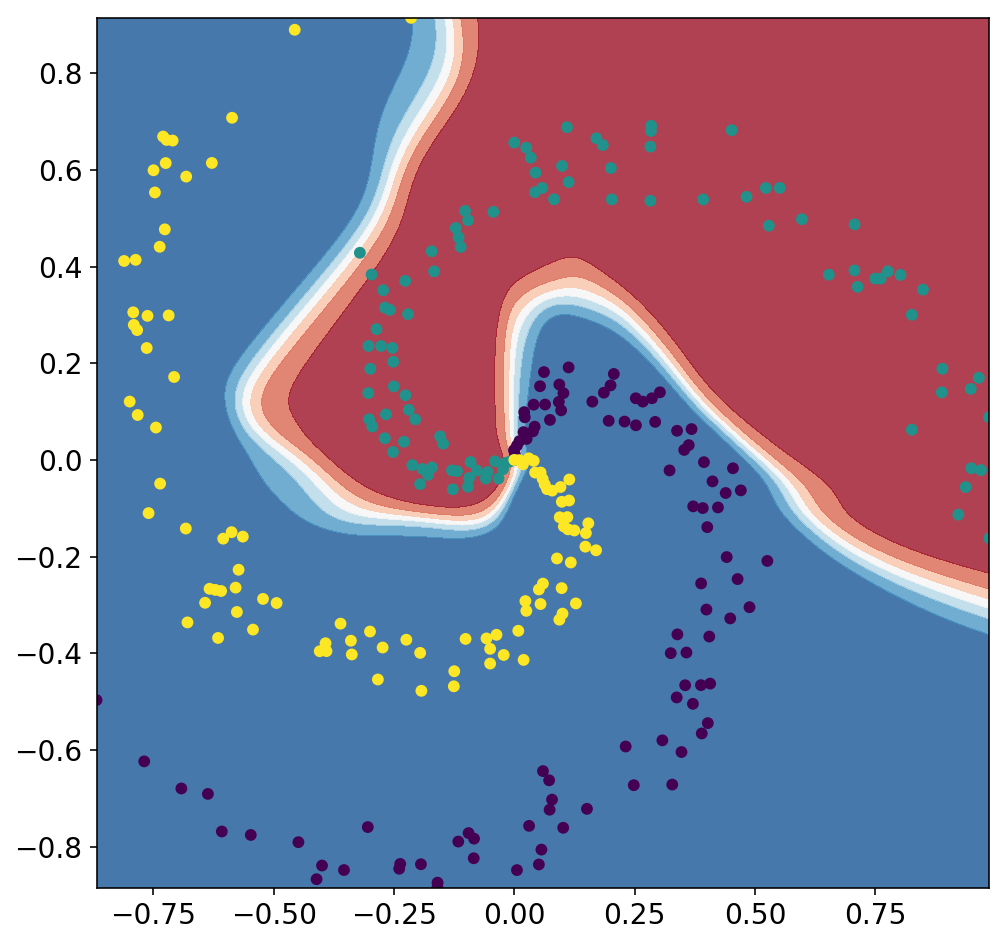

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        22
          1       1.00      1.00      1.00        16
          2       1.00      0.95      0.98        22

avg / total       0.98      0.98      0.98        60



In [35]:
clf = MLPClassifier(activation='tanh',hidden_layer_sizes=(40,20), verbose = False,learning_rate = 'adaptive', learning_rate_init = 0.05)
clf.fit(X_train,y_train)
plot_surface(clf,X,y)
clf.score(X_test,y_test)
print(classification_report(y_test,clf.predict(X_test)))

---

## Question 3

Build a fully connected neural network and a ConvNet to classify hand written digits.

scikit-learn's NN implementation does not support convolutional layers so it is probably
best to implement both using `keras`.

Experiment with different network architectures, different optimisers and such.

You should be able to achieve accuracies > 95% pretty quickly. With a bit of experimenting
you can probably reach 98% or 99%.

This question is about getting you comfortable using `keras` and constructing networks
from basic building blocks. Feel free to experiment, brnach out and try different things.

Note: this might take a while to train, unfortunately.

In [10]:
# loading the MNIST (or digits) dataset in keras
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# the first time you run this you need to have internet so it can download the data

Using TensorFlow backend.


In [ ]:
# some of the layers we discussed in class, checkout the documentation if you need more
# or want to experiment
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# your solution